In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%xmode minimal

# import data into dataframe
raw_data = pd.read_csv('data/gender-classifier-DFE-791531.csv', encoding='ISO-8859-1')

# rename column for greater simplicity
raw_data.rename({'_unit_id':'unit_id'}, axis=1, inplace=True)

# replace unit_id as index 
raw_data.set_index('unit_id', inplace=True)

# store original record count for later
orig_count = raw_data.shape[0]

Exception reporting mode: Minimal


# Initial Data

In [2]:
raw_data.head()

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
unit_id,,,,,,,,,,,,,,,,,,,,,
815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


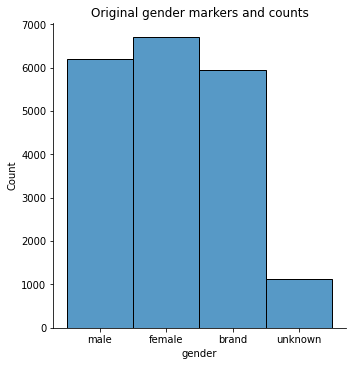

In [3]:
# distribution of values for gender

sns.displot(data=raw_data, x='gender').set(title='Original gender markers and counts');

# Cleaning the Data

In [4]:
# make gen_data df 
# drop records that have 'unknown', 'brand', and nan values for gender

gen_data = raw_data[raw_data['gender']!= 'unknown']
gen_data = gen_data[gen_data['gender']!= 'brand']
gen_data = gen_data[gen_data['gender'].notna()]

## New DataFrame with only Female and Male gender markers

In [5]:
gen_data.head()

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
unit_id,,,,,,,,,,,,,,,,,,,,,
815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


## Number of records before and after cleaning

In [6]:
print(f"Initial number of records: {orig_count}")
print(f"New number of records (only 'male' and 'female' gender markers): {gen_data['gender'].count()}")

Initial number of records: 20050
New number of records (only 'male' and 'female' gender markers): 12894


## Confirm we can index on unit_id (unique value for each row)

In [7]:
indx = gen_data.index
indx.is_unique

True

## Perform One Hot Encoding with Gender Values

In [8]:
gen_dum = pd.get_dummies(gen_data["gender"])

gen_data = pd.concat([gen_data, gen_dum], axis=1)

**Notice the two new columns labeled "female" and "male" with values 0 and 1.** <br> 
**Drop "male" because redundant for this data (e.g., [female=0] == [male=1]).** 

In [9]:
gen_data.drop(columns=["male"], inplace=True)
gen_data.head()

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,...,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,female
unit_id,,,,,,,,,,,,,,,,,,,,,
815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai,0
815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada),0
815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,0
815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),0
815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN,1


## Identify unique values per column

In [10]:
# determine if there are duplicate records that need to be dropped
# make a list of column names
col_lst = gen_data.columns.values.tolist()
cnt_lst = []

for col in col_lst:
    cnt_lst.append(len(gen_data[col].unique()))

# create df from these two lists
eda_df = pd.DataFrame(list(zip(col_lst, cnt_lst)),columns=['col_names','unique_counts']).set_index("col_names")

## Identify null values

In [11]:
gen_data.isnull().sum()

_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           36
gender                       0
gender:confidence            0
profile_yn                   0
profile_yn:confidence        0
created                      0
description               1700
fav_number                   0
gender_gold              12858
link_color                   0
name                         0
profile_yn_gold          12858
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              12816
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            4147
user_timezone             4397
female                       0
dtype: int64

#### After seeing these, I would say we could get rid of "gender_gold", "profile_yn_gold" & "tweet_coord". 

In [12]:
gen_data.drop(columns=["gender_gold","profile_yn_gold","tweet_coord"], inplace=True)
gen_data.head()

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,...,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,female
unit_id,,,,,,,,,,,,,,,,,,,,,
815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai,0
815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada),0
815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,0
815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),0
815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40,6.587300e+17,NaN,NaN,1


**Also drop these columns from original dataset analysis: "_golden", "_unit_state", "_trusted_judgments", "_last_judgment_at", "gender:confidence", "profile_yn", "profile_yn:confidence"**

In [13]:
gen_data.drop(columns=["_golden","_unit_state","_trusted_judgments","_last_judgment_at", "gender:confidence","profile_yn","profile_yn:confidence"], inplace=True)
gen_data.head()

,gender,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,female
unit_id,,,,,,,,,,,,,,,,
815719226,male,12/5/13 1:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai,0
815719227,male,10/1/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada),0
815719228,male,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,0
815719229,male,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),0
815719230,female,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40,6.587300e+17,NaN,NaN,1


## Add column "usr_count" with number of tweets per user in df

In [14]:
gen_data["name"].value_counts().sort_values(ascending=False).head(30)

gen_data["usr_count"] = gen_data.groupby("name")["name"].transform('count')

## Some of the fields we are interested and their corresponding number of unique values: 

In [15]:
# initial choices
eda_df.loc[["gender", "female", "description", "name", "text", "fav_number", "retweet_count"],:]

,unique_counts
col_names,
gender,2
female,2
description,10658
name,12310
text,12724
fav_number,5987
retweet_count,17


In [16]:
# possible additional analysis
eda_df.loc[["created","sidebar_color","tweet_count","tweet_location"],:]

,unique_counts
col_names,
created,12263
sidebar_color,419
tweet_count,9926
tweet_location,6067


# Exploratory Data Analysis Part 1

## Gender 

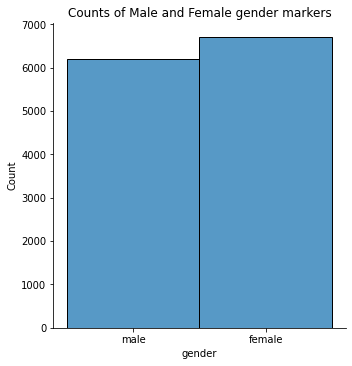

In [17]:
sns.displot(data=gen_data, x='gender')
plt.title("Counts of Male and Female gender markers");

## Name 

In [18]:
gen_data["name"].head(20)

unit_id
815719226            sheezy0
815719227        DavdBurnett
815719228     lwtprettylaugh
815719229        douggarland
815719230       WilfordGemma
815719231      monroevicious
815719233         RobinMeske
815719234          pigzilla_
815719235      GabrieleNeher
815719238     kaylanabrewer_
815719240           cheyflan
815719241          Ayu7sith4
815719242       Toucaan_Samm
815719243         SSmyth2010
815719244    DarkToonsGaming
815719246          jlpeter37
815719247        SarahMaddry
815719248           bethleia
815719249        StrictlyAri
815719250           JHurkett
Name: name, dtype: object

### Sort dataframe to only incl users that have more than one tweet in df

In [19]:
# all users that have more than 1 tweet in this dataframe
gen_data[gen_data["usr_count"] > 1]

,gender,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,female,usr_count
unit_id,,,,,,,,,,,,,,,,,
815719241,female,10/3/15 21:32,NaN,0,0084B4,Ayu7sith4,https://pbs.twimg.com/profile_images/650530183...,0,C0DEED,https://t.co/EROGWTFTYo It's a glow of satisfa...,44421,10/26/15 12:40,6.587300e+17,NaN,NaN,1,4
815719291,male,3/4/13 6:45,' You are to me All that an angel could be. ' ...,10536,ABB8C2,realangelhes,https://pbs.twimg.com/profile_images/655712588...,0,FFFFFF,"@Harry_Styles always remember, never forget yo...",237421,10/26/15 12:40,6.587300e+17,ãÜ is everything __Ï¤_Ô,Baghdad,0,2
815719312,male,1/17/10 6:02,"Sportswriter, cigar lover, dreamer. Pro writer...",8900,51014,JakeElman,https://pbs.twimg.com/profile_images/658346486...,0,0,If you say someone like Wale or Meek or Wiz ha...,75684,10/26/15 12:40,6.587300e+17,Florida,Central Time (US & Canada),0,2
815719320,male,8/5/10 8:31,"Maker, Conceptor & Creative Developer - 0xBAC3...",193,107FC9,Adrien_RG,https://pbs.twimg.com/profile_images/643511925...,0,FFFFFF,Reimagining the #webdesign process by @InVisio...,3874,10/26/15 12:40,6.587300e+17,127.0.0.1,Athens,0,2
815719336,female,10/3/15 21:32,NaN,0,0084B4,Ayu7sith4,https://pbs.twimg.com/profile_images/650530183...,0,C0DEED,https://t.co/EROGWToizO SissyÛªs wife loved t...,44421,10/26/15 12:40,6.587300e+17,NaN,NaN,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815757572,female,8/5/15 21:16,(rp),302,0084B4,capuletrosa,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN,1,2
815757681,male,8/15/12 21:17,"Whatever you like, it's not a problem at all. ...",2513,CFB929,BenNight41,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN,0,2
815757830,male,9/3/12 1:17,#TeamBarcelona ..You look lost so you should f...,50,0084B4,realuzzyfluxz,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN,0,2


### Users with more than one tweet in dataframe

In [20]:
gen_data[gen_data["usr_count"] > 1]["name"]

unit_id
815719241        Ayu7sith4
815719291     realangelhes
815719312        JakeElman
815719320        Adrien_RG
815719336        Ayu7sith4
                 ...      
815757572      capuletrosa
815757681       BenNight41
815757830    realuzzyfluxz
815757921     argumatronic
815757985      MeganFitz20
Name: name, Length: 982, dtype: object

## Description

In [21]:
pd.options.display.max_colwidth = 200 # adjust view to see complete text
gen_data["description"].head(10)


unit_id
815719226                                                                                                                                               i sing my own rhythm.
815719227                                                                                                      I'm the author of novels filled with family drama and romance.
815719228                                                                                                                                 louis whining and squealing and all
815719229                  Mobile guy.  49ers, Shazam, Google, Kleiner Perkins, Yahoo!, Sprint PCS, AirTouch, Air Force.  Stanford GSB, UVa.  Dad, Husband, Brother.  Golfer.
815719230    Ricky Wilson The Best FRONTMAN/Kaiser Chiefs The Best BAND Xxxx Thank you Kaiser Chiefs for an incredible year of gigs and memories to cherish always :) Xxxxxxx
815719231                                                                                                                 

## Text

In [22]:
gen_data["text"].head(10)


unit_id
815719226                                  Robbie E Responds To Critics After Win Against Eddie Edwards In The #WorldTitleSeries https://t.co/NSybBmVjKZ
815719227    ÛÏIt felt like they were my friends and I was living the story with themÛ https://t.co/arngE0YHNO #retired #IAN1 https://t.co/CIzCANPQFz
815719228                                                               i absolutely adore when louis starts the songs it hits me hard but it feels good
815719229     Hi @JordanSpieth - Looking at the url - do you use @IFTTT?!  Don't typically see an advanced user on the @PGATOUR! https://t.co/H68ou5PE9L
815719230                                                Watching Neighbours on Sky+ catching up with the Neighbs!! Xxx _Ù÷Ä_Ù÷Ä_Ù÷Ä_ÙÔÎ_ÙÈ_ÙÔ_ÙÈ Xxx
815719231                                                              Ive seen people on the train with lamps, chairs, tvs etc  https://t.co/w6zf4pVM4I
815719233       Gala Bingo clubs bought for å£241m: The UK's largest High 

In [23]:
gen_data.head()

,gender,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,female,usr_count
unit_id,,,,,,,,,,,,,,,,,
815719226,male,12/5/13 1:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229096808449/fYvzqXN7_normal.png,0,FFFFFF,Robbie E Responds To Critics After Win Against Eddie Edwards In The #WorldTitleSeries https://t.co/NSybBmVjKZ,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai,0,1
815719227,male,10/1/12 13:51,I'm the author of novels filled with family drama and romance.,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221532700673/WW16tBbU_normal.jpeg,0,C0DEED,ÛÏIt felt like they were my friends and I was living the story with themÛ https://t.co/arngE0YHNO #retired #IAN1 https://t.co/CIzCANPQFz,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada),0,1
815719228,male,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418249658368/SBLCXdF7_normal.png,1,C0DEED,i absolutely adore when louis starts the songs it hits me hard but it feels good,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,0,1
815719229,male,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Perkins, Yahoo!, Sprint PCS, AirTouch, Air Force. Stanford GSB, UVa. Dad, Husband, Brother. Golfer.",202,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936/IMG_8444_normal.JPG,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you use @IFTTT?! Don't typically see an advanced user on the @PGATOUR! https://t.co/H68ou5PE9L,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),0,1
815719230,female,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs The Best BAND Xxxx Thank you Kaiser Chiefs for an incredible year of gigs and memories to cherish always :) Xxxxxxx,37318,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871032446976/AOfpk-mr_normal.jpeg,0,0,Watching Neighbours on Sky+ catching up with the Neighbs!! Xxx _Ù÷Ä_Ù÷Ä_Ù÷Ä_ÙÔÎ_ÙÈ_ÙÔ_ÙÈ Xxx,31462,10/26/15 12:40,6.587300e+17,NaN,NaN,1,1


# Generalization

- **gen_none:** no generalization
- **gen_low:** low generalization
    - description, fav_number, tweet_count: 
        - min to 1st quartile
        - 1st quartile to median
        - median to 3rd quartile
        - 3rd quartile to max
    - sidebar_color: 
        - "blue"
        - "white" 
        - "other"
- **gen_high:** high generalization
    - description, fav_number, tweet_count: 
        - less than or equal to median
        - greater than median
    - sidebar_color: 
        - "blue"
        - "other"

In [24]:
# gen_none df
gen_none = pd.DataFrame() # create empty dataframe

# copy from original gen_data
gen_none["description"] = gen_data["description"].str.len() # character count instead of characters
gen_none["fav_number"] = gen_data["fav_number"]
gen_none["sidebar_color"] = gen_data["sidebar_color"]
gen_none["tweet_count"] = gen_data["tweet_count"]
# gen_none["retweet_count"] = gen_data["retweet_count"]
gen_none["name"] = gen_data["name"]
gen_none["gender"] = gen_data["female"] # 0: M, 1: F

In [25]:
gen_data.groupby("gender")["retweet_count"].value_counts()

gender  retweet_count
female  0                6527
        1                 143
        2                  17
        3                   3
        5                   2
        4                   1
        6                   1
        7                   1
        8                   1
        9                   1
        11                  1
        23                  1
        49                  1
male    0                5970
        1                 184
        2                  18
        6                   7
        3                   5
        20                  2
        4                   1
        5                   1
        7                   1
        8                   1
        10                  1
        11                  1
        36                  1
        153                 1
Name: retweet_count, dtype: int64

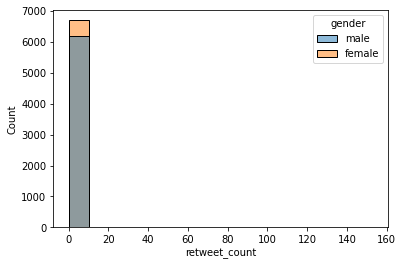

In [26]:
# retweet count might not be that useful, see ^^ & --> 
sns.histplot(data=gen_data, x="retweet_count", hue="gender");

In [27]:
gen_none.tweet_count.quantile([0.25,0.5,0.75]) # used this to find median, first and third quartiles

0.25     2273.75
0.50     9306.00
0.75    30235.25
Name: tweet_count, dtype: float64

In [28]:
# gen_low df
gen_low = gen_none.copy()

# generalize
gen_low.loc[(gen_low["sidebar_color"] != "C0DEED") & (gen_low["sidebar_color"] != "FFFFFF") & (gen_low["sidebar_color"] != "0"), "sidebar_color"] = "other"
gen_low.loc[gen_low["sidebar_color"] == "FFFFFF", "sidebar_color"] = "white"
gen_low.loc[gen_low["sidebar_color"] == "C0DEED", "sidebar_color"] = "blue"

gen_low.loc[gen_low["description"] <= 34, "description"] = 0 
gen_low.loc[(gen_low["description"] > 34) & (gen_low["description"] <= 74) , "description"] = 1
gen_low.loc[(gen_low["description"] > 74) & (gen_low["description"] <= 127), "description"] = 2 
gen_low.loc[gen_low["description"] > 127, "description"] = 3

gen_low.loc[gen_low["fav_number"] <= 137, "fav_number"] = 0
gen_low.loc[(gen_low["fav_number"] > 137) & (gen_low["fav_number"] <= 1126) , "fav_number"] = 1
gen_low.loc[(gen_low["fav_number"] > 1126) & (gen_low["fav_number"] <= 4956.5), "fav_number"] = 2 
gen_low.loc[gen_low["fav_number"] > 4956.5, "fav_number"] = 3

gen_low.loc[gen_low["tweet_count"] <= 2273.75, "tweet_count"] = 0
gen_low.loc[(gen_low["tweet_count"] > 2273.75) & (gen_low["tweet_count"] <= 9306) , "tweet_count"] = 1
gen_low.loc[(gen_low["tweet_count"] > 9306) & (gen_low["tweet_count"] <= 30235.25), "tweet_count"] = 2 
gen_low.loc[gen_low["tweet_count"] > 30235.25, "tweet_count"] = 3

In [29]:
gen_low.head()

,description,fav_number,sidebar_color,tweet_count,name,gender
unit_id,,,,,,
815719226,0.0,0,white,3,sheezy0,0
815719227,1.0,0,blue,1,DavdBurnett,0
815719228,1.0,3,blue,1,lwtprettylaugh,0
815719229,3.0,1,blue,0,douggarland,0
815719230,3.0,3,0,3,WilfordGemma,1


In [30]:
# gen_high df
gen_high = gen_none.copy()

# generalize
gen_high.loc[(gen_high["sidebar_color"] != "C0DEED") & (gen_high["sidebar_color"] != "0"), "sidebar_color"] = "other"
gen_high.loc[gen_high["sidebar_color"] == "C0DEED", "sidebar_color"] = "blue"

gen_high.loc[gen_high["description"] <= 74, "description"] = 0 
gen_high.loc[gen_high["description"] > 74, "description"] = 1

gen_high.loc[gen_high["fav_number"] <= 1126, "fav_number"] = 0
gen_high.loc[gen_high["fav_number"] > 1126, "fav_number"] = 1

gen_high.loc[gen_high["tweet_count"] <= 9306, "tweet_count"] = 0
gen_high.loc[gen_high["tweet_count"] > 9306, "tweet_count"] = 1

In [31]:
gen_high.head()

,description,fav_number,sidebar_color,tweet_count,name,gender
unit_id,,,,,,
815719226,0.0,0,other,1,sheezy0,0
815719227,0.0,0,blue,0,DavdBurnett,0
815719228,0.0,1,blue,0,lwtprettylaugh,0
815719229,1.0,0,blue,0,douggarland,0
815719230,1.0,1,0,1,WilfordGemma,1


# Exploratory Data Analysis Part 2

## Look at relationships between gender & other features (columns)

### Gender & Description

### Gender & Tweet

### Gender & Tweet Count

### Gender & Names
**use NLP based on top 10,000 gendered names**

# Run the following cell to output DataFrame as .csv:

In [32]:
# gen_data.to_csv("data/gen_data.csv", sep=',', header=True, index=True)

In [33]:
gen_none.to_csv("data/gen_none.csv", sep=',', header=True, index=False)
gen_low.to_csv("data/gen_low.csv", sep=',', header=True, index=False)
gen_high.to_csv("data/gen_high.csv", sep=',', header=True, index=False)